In [1]:
from hdimvis.data_fetchers.DataFetcher import DataFetcher
from hdimvis.metrics.distance_measures.euclidian_and_manhattan import manhattan,euclidean
from hdimvis.algorithms.spring_force_algos.chalmers96_algo.Chalmers96 import Chalmers96
from hdimvis.create_low_d_layout.LowDLayoutCreation import LowDLayoutCreation
from hdimvis.visualise_layouts_and_metrics.plot import show_layouts, show_generation_metrics
from sklearn.decomposition import PCA
import numpy as np

In [2]:


all_datasets_list = ['poker', 'mnist', 'bonds', 'coil20', 'rna N3k', 'airfoil', 'wine quality', 'fashion mnist'
                                                                                                'shuttle',
                     'flow cytometry']


metric_collection = {'Average speed': 10, 'Stress': 20}

dataset = DataFetcher.fetch_data('coil20')
Xld = PCA(n_components=2, whiten=False, copy=True).fit_transform(dataset.data).astype(np.float64)
Xld *= 10/np.std(Xld)

zero_initial = np.zeros((dataset.data.shape[0], 2))


####################
Fetching the "coil20" dataset
####################
Dataset loaded
Dataset shape: (1440, 1024)


In [19]:
# tracemalloc.start()
algo96 = Chalmers96(dataset=dataset, initial_layout=None,  distance_fn=euclidean,
                    damping_constant=0, spring_constant=0.01,
                    use_knnd=False, sample_set_size=50, neighbour_set_size=20)


layout = LowDLayoutCreation().create_layout(algo96, optional_metric_collection=None, no_iters=100)
# print(tracemalloc.get_traced_memory())
# tracemalloc.stop()


####################
The algorithm will use a random initialization for the low D embedding/layout
####################
A 2D layout of the "coil20" dataset will be created 
using the "Chalmers' 1996" algorithm
####################
The HD distance measure used is: euclidean
####################
####################
No metrics will be collected during layout creation. 
To change this use the 'metric collection' parameter of the layout 
####################
All stress calculations will be performed using the euclidian norm
####################
Spring constant is set to  0.01 
Damping constant is set to 0 
####################


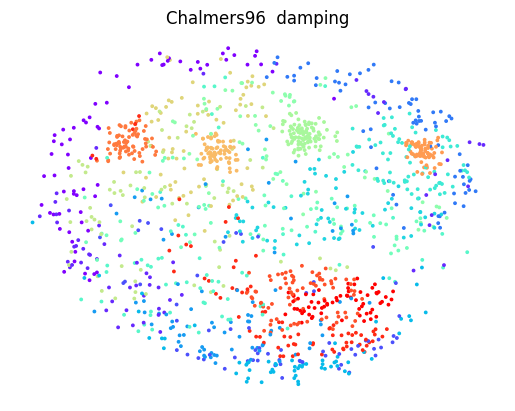

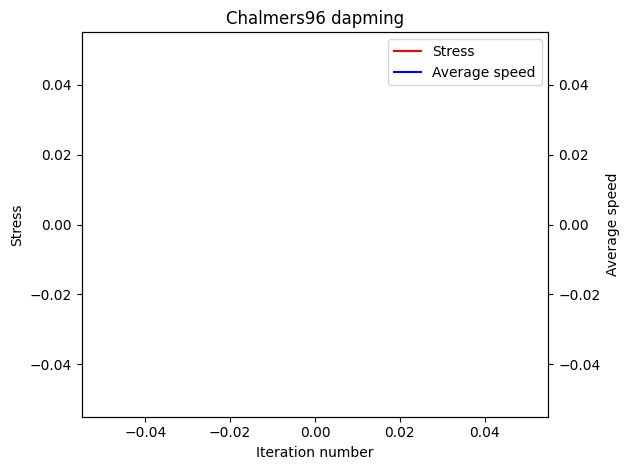

In [20]:
# print(f"iterations stress: {layout.collected_metrics['stress'][0]} \n")
# print(f"iterations velocity: {layout.collected_metrics['average speed'][0]} \n")
# print(f"velocity: {layout.collected_metrics['Average speed'][1]} \n")
# print(f" stress: {layout.collected_metrics['Stress'][1]} \n")
# print("total time: {}")
show_layouts(layout, use_labels=True, color_map='rainbow', title="Chalmers96  damping")
show_generation_metrics(layout, title="Chalmers96 dapming", average_speed=True, stress=True)